In [1]:
from __future__ import division
import warnings
import string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
# Information about the data is here: http://anthology.aclweb.org/H/H93/H93-1005.pdf
# feature descriptions: http://www.cs.columbia.edu/~djhsu/coms4721-s16/project/field_types.txt

In [3]:
task = pd.read_csv('./competition/data/data.csv')
quiz = pd.read_csv('./competition/data/quiz.csv')

In [4]:
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Preprocessing

#### Rename the columns to make them easier to work with

In [5]:
alphabet = list(string.ascii_lowercase)
alphabet2 = alphabet + [l+l for l in alphabet] + ['aaa']

In [7]:
task.columns = alphabet2

#### Create useful column subsets

In [287]:
paired_cols = [
    ['a', 'f', 'k'],
    ['b', 'g', 'l'],
    ['c', 'h', 'm'],
    ['d', 'i', 'n'],
    ['e', 'j', 'o'],
    ['ss', 'tt', 'uu']
]

categorical_cols = [
    'a', 'c', 'd', 'e',
    'f', 'h', 'i', 'j',
    'k', 'l', 'm', 'n',
    'o', 'ss', 'tt', 'uu'
]

zero_one_two_cols = [
    'aa', 'bb', 'cc',
    'dd', 'ee', 'ff',
    'gg', 'hh', 'ii',
    'jj', 'kk', 'll',
    'mm', 'nn'
]

boolean_cols = [
    'p', 'q', 'r', 's',
    't', 'u', 'v', 'w',
    'x', 'y', 'z', 'oo',
    'pp', 'qq', 'rr', 
    'xx', 'yy', 'zz'
]

potentially_useless_cols = [
    'x', 'u', 't', 'r'
]

#### Column Descriptions
- Data From: THE HCRC MAP TASK CORPUS: NATURAL DIALOGUE FOR SPEECH RECOGNITION 
- The corpus is composed of 128 two-person conversations
- The data is an orthographic transcription
- value of the dataset: "Examples supporting this claim are given, including preliminary evidence of the phonetic consequences of second mention and the impact of different styles of referent negotiation on communicative efficacy."
- In particular, maps and feature names were designed to allow for controlled exploration of phonological reductions of various kinds in a number of different referential contexts, and to provide a range of different stimuli to referent negotiation, based on matches and mis-matches between the two maps.
- __The task was for the participant without the route to draw one on the basis of discussion with the participant with the route.__
- 150,000 word tokens, 2000 word types.  __IDEA:__ We should see if there are columns that wehn tokenized add to 150,000.  There might be words that are highly correlated with the outcome type.
- __QUESTION__: What are the outcomes?  If we can figure that out, it might give us ideas for how to determine which features are most relevant. 
- __QUESTION__: what are f 'accent diagnosis' utterances?
- The transcriptions are at the orthographic level, quito detailed, including filled pauses, false starts and repetitions, broken words, 26 etc. 

#### Observations
- There seem to be 'part of speech' columns
- There are a number of columns that only take on the values 0, 1, or 2.  They could be counts?
- There are a number of boolean columns where there are very few 1s
- __IDEA__: Can we use the token information to determine which colums are the eye contact ones?
- __IDEA__: Are the 0,1,2 codes for None, Definite, Indefinite?
- __QUESTION:__ which are the eye contact and familiarity columns?
- uu and m have the most possible values

#### Column Findings
 - columns d and i are the the roles (Intruction Follower or Giver) and n is the sequence  
 - columnds d,e,f and i,j,k have the same possible values

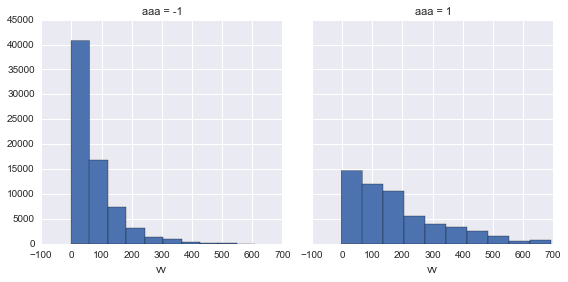

In [45]:
# Class-conditional distribution of the ww column
g = sns.FacetGrid(task, col="aaa", size=4)
g = g.map(plt.hist, "vv")

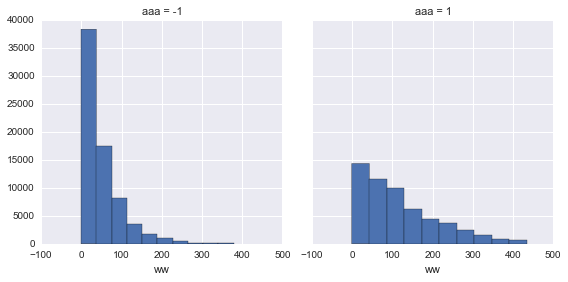

In [44]:
# Class-conditional Distribution of the ww column
g = sns.FacetGrid(task, col="aaa", size=4)
g = g.map(plt.hist, "ww")

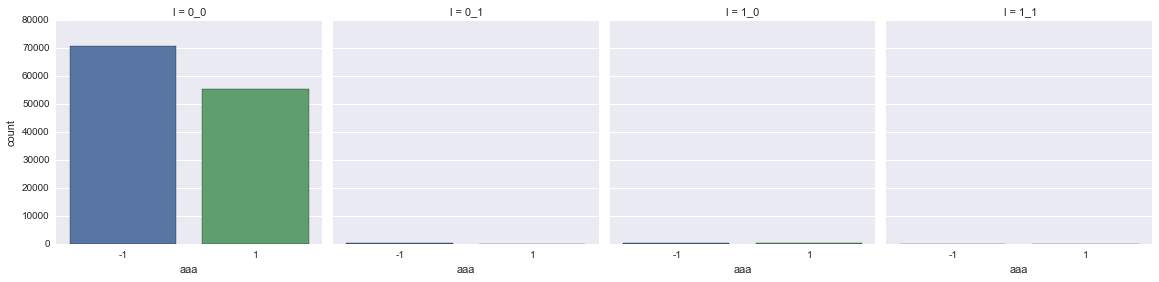

In [47]:
# Class-conditional count of l column
g = sns.factorplot("aaa", col="l", col_wrap=4,
                    data=task, kind="count", size=4)

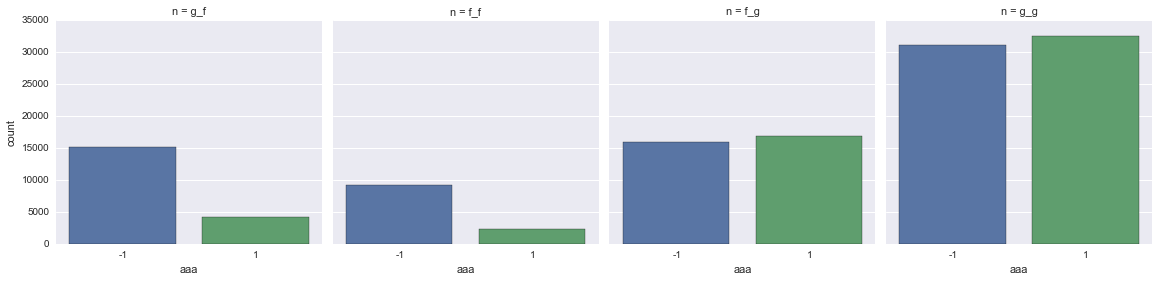

In [280]:
# Class-conditional distribution of n column
g = sns.factorplot("aaa", col="n", col_wrap=4,
                    data=task, kind="count", size=4)

### Feature Creation

#### One-hot encoding of the categorical columns

In [196]:
X_dummies = pd.get_dummies(task[categorical_cols].e).as_matrix()

#### Normalization of the Numeric cols

In [296]:
# task.ww[task.ww > 10].apply(np.log)
# task.vv[task.vv > 10].apply(np.log)

### Feature Selection

#### Dropping redundant columns

In [298]:
# TODO: # Find correlated features and drop them
# task.drop(potentially_useless_cols, inplace=True)

In [261]:
# X = task[categorical_cols].as_matrix()
X_encoded = pd.get_dummies(task[categorical_cols]).as_matrix()
y = task.aaa.as_matrix()

In [265]:
rf_clf = RandomForestClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier()

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

In [256]:
rf_clf.fit(X_train, y_train).score(X_test, y_test)

0.87276582853680706

In [153]:
ada_clf.fit(X_train, y_train).score(X_test, y_test)

0.7081491745705617

In [277]:
task.vv.apply(np.log).describe()

count    1.267490e+05
mean             -inf
std               NaN
min              -inf
25%      3.178054e+00
50%      4.356709e+00
75%      5.117994e+00
max      6.542472e+00
Name: vv, dtype: float64

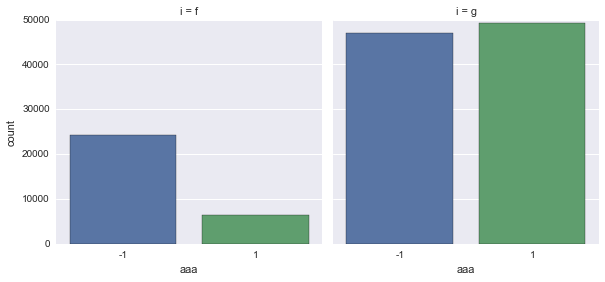

In [267]:
g = sns.factorplot("aaa", col="i", col_wrap=4,
                   data=task, kind="count", size=4)

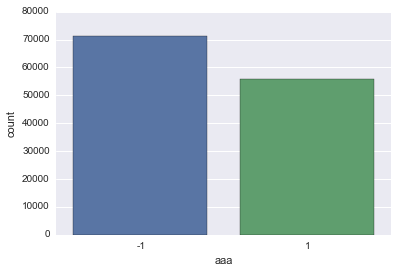

In [53]:
sns.countplot('aaa', data=task)

In [61]:
# g = sns.factorplot("aaa", col="e", col_wrap=4,
#                    data=task, kind="count", size=4)

In [62]:
# g = sns.factorplot("aaa", col="j", col_wrap=4,
#                    data=task, kind="count", size=4)

In [79]:
# g = sns.factorplot("aaa", col="e_j", col_wrap=4,
#                    data=task, kind="count", size=4)

In [166]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [167]:
seed = np.random.RandomState(seed=3)

In [168]:
X = task[boolean_cols].ix[:1000].as_matrix()

In [169]:
# X_norm = (X - X.mean()) / (X.max() - X.min())

In [170]:
similarities = euclidean_distances(X)

In [171]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)

In [172]:
pos = mds.fit(similarities).embedding_

In [174]:
posdf = pd.DataFrame(pos, columns= ['x', 'y'])
posdf['label'] = task.aaa[:1001]

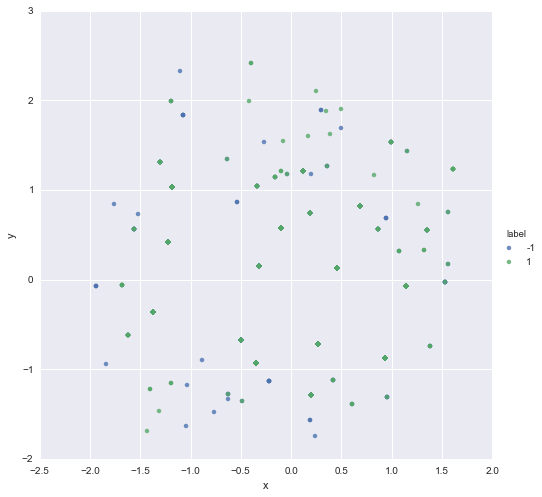

In [176]:
sns.lmplot('x', 'y', posdf, fit_reg=False, hue='label', size=7)

In [ ]:
# check for separability. Nope, not separable.
# http://stats.stackexchange.com/questions/47923/test-for-linear-separability

In [ ]:
X = task[boolean_cols].as_matrix()[-10001:]
y = task.aaa[-10001:]

In [ ]:
from sklearn.svm import SVC
# clf = SVC(kernel='rbf')
clf = SVC(gamma=2, C=1)
clf.fit(X, y)
clf.score(X, y)

### Testing Multiple Classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
